In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

The dataset contains *transactions made by credit cards in September 2013 by European cardholders*.<br>
This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the positive class (frauds) account for **0.172%** of all transactions.

# DATA PREPROCEESSING


In [7]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


It contains only numerical input variables which are the result of a **PCA transformation**. Unfortunately, due to **confidentiality issues**, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'

Here we use ProfileReport from pandas_profiling to understand Dataset and visualise them

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h1>Conclusions</h1>
<li>All the features are numerical except for target frature "Class"(catogorical)</li>
<li>There are no missing cells i.e no need for imputing</li>
<li>As this is a large data set to work on and there is high corelation betweer features there is further scope for feature reduction through <strong>PCA</strong></li>
<li>As the feature value are of wide range and there is no information about feature importance the data can be <strong>sclaled</strong> for better performance</li>

In [4]:
#removing duplicate vlaues
#df = df.drop_duplicates()

## Visulatizations


No of instances that are fraud 492
No of instances that are not fraud 284315


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


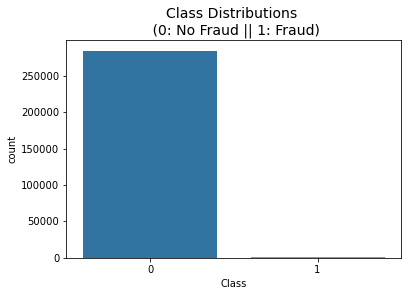

In [10]:
sns.countplot('Class', data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize = 14)
print("No of instances that are fraud",df[df["Class"]==1].shape[0])
print("No of instances that are not fraud",df[df["Class"]==0].shape[0])
plt.show()

<li>Number of instances that are fraud 492</li>
<li>Number of instances that are not fraud 284315</li>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 172792.0)

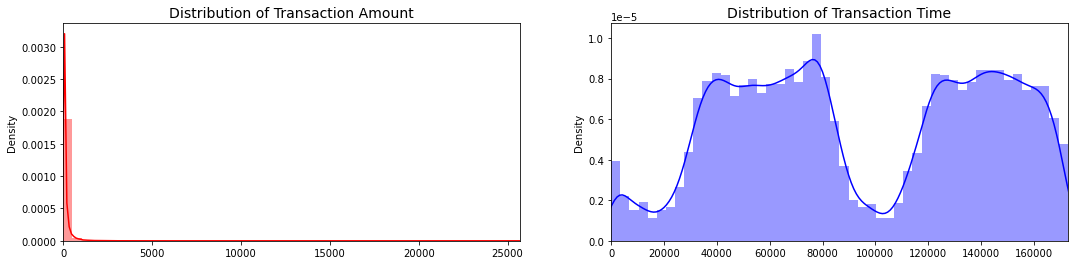

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

<h1>It is an highly imbalanced dataset</h1></br>
<p>As we can see it is an highly imbalanced dataset.Machine learning algorithms for classificaton works better when the number of samples in each class are about equal.if we use accuracy as metrics an hypothetical function which given input, which always gives output as not fraud will give about 99.9% accuracy.</p></br>
<p>Hence we resample data using under-sampling and over-sampling techniques(<strong>SMOTE</strong>)</p>

In [14]:
X = df.drop(['Class'], axis=1)#asigning all features except "Class" to dataframe X
y = df['Class']#asigning target variable to y

In [15]:
#Scaling the data using minmax scaler
scaler = MinMaxScaler()
temp = scaler.fit_transform(X)
X_s = pd.DataFrame(temp, columns=X.columns)
df = pd.concat([df["Class"],X_s],axis=1)
df

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


## Random Undersampling and Oversampling
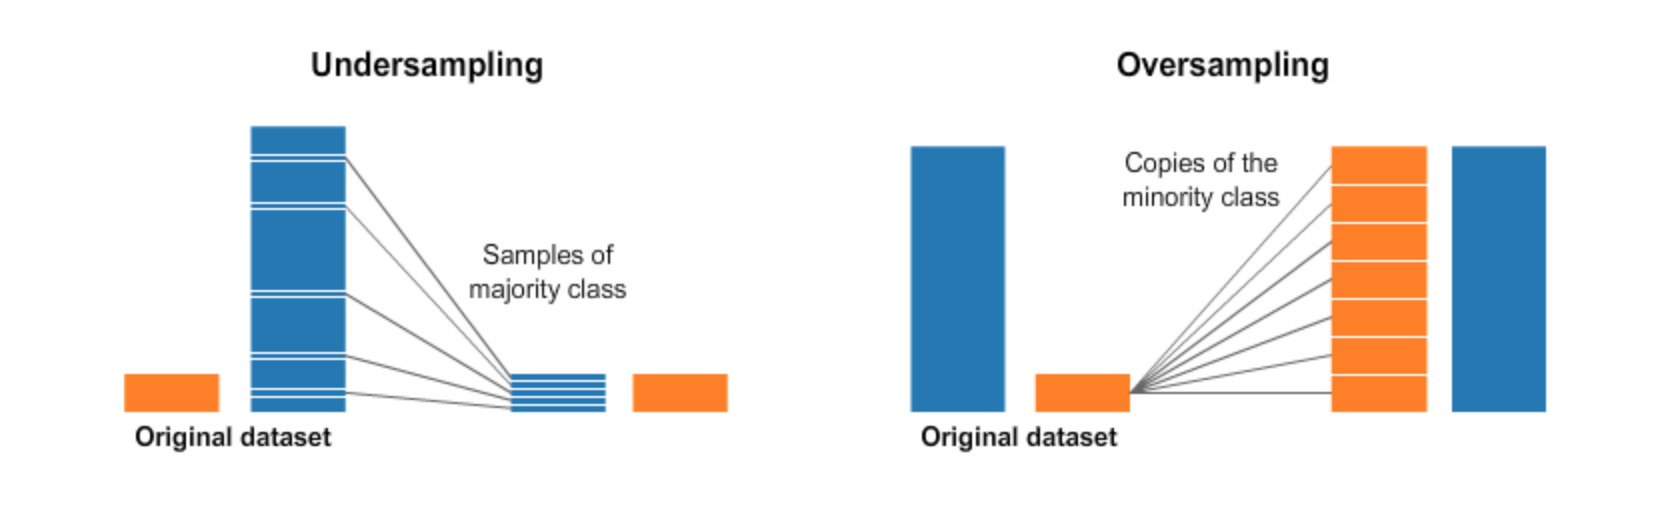


### OverSampling the minority class(fraud)

In [16]:
fraud = df[df["Class"]==1]#creating fraud dataset which contains all datavalues which belongs to class fraud(class 1)
fraud = fraud.sample(frac=1) # randomly suffling the dataset


In [17]:
fraud = pd.concat([fraud,fraud,fraud,fraud,fraud])#oversampling fraud dataset by repeating the every datapoints 5 times
fraud.sample(frac=1)#randomly suffiling the dataset


,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
147548,1,0.513172,0.892719,0.795039,0.746191,0.404693,0.761171,0.243867,0.245306,0.774811,...,0.578363,0.588306,0.546655,0.666450,0.487199,0.529455,0.424336,0.396840,0.349110,0.000046
151196,1,0.549516,0.972599,0.763402,0.794715,0.465636,0.770937,0.256839,0.273690,0.779740,...,0.590326,0.559696,0.451355,0.660616,0.325637,0.565585,0.381529,0.413842,0.315244,0.022244
15781,1,0.157525,0.529050,0.918390,0.372598,0.533387,0.640069,0.216294,0.155873,0.963806,...,0.597922,0.590185,0.423201,0.647788,0.403345,0.677160,0.389525,0.442571,0.321539,0.003892
42609,1,0.238263,0.847899,0.817383,0.682036,0.566616,0.718873,0.234646,0.202403,0.828635,...,0.586317,0.596270,0.515233,0.668648,0.461017,0.620587,0.438838,0.442630,0.313837,0.003245
46909,1,0.248767,0.889048,0.777420,0.749453,0.471624,0.764630,0.234540,0.218935,0.802751,...,0.580892,0.578095,0.517744,0.650323,0.317826,0.560787,0.408119,0.451575,0.323503,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248971,1,0.892292,0.948956,0.790673,0.776382,0.262436,0.773037,0.250598,0.263654,0.790903,...,0.581612,0.567349,0.519847,0.659998,0.384364,0.597509,0.531184,0.419684,0.315502,0.000030
143731,1,0.495254,0.920789,0.801646,0.743209,0.415272,0.745073,0.256270,0.242838,0.804933,...,0.588872,0.576325,0.511789,0.665831,0.275581,0.587814,0.403182,0.436585,0.320710,0.009372
102444,1,0.394735,0.734167,0.902169,0.665745,0.399118,0.733395,0.320932,0.151123,0.384700,...,0.543073,1.000000,0.095452,0.744197,0.296071,0.592681,0.407664,0.439944,0.332187,0.000039
68522,1,0.306907,0.961795,0.781897,0.819300,0.439384,0.754625,0.261201,0.247422,0.794602,...,0.584008,0.569043,0.526122,0.662407,0.432986,0.618069,0.462365,0.428112,0.319616,0.000030


### UnderSampling the majority class(not fraud)

In [18]:
nfraud = df[df["Class"]==0]#creating fraud dataset which contains all datavalues which belongs to class not fraud(class 0)
nfraud = nfraud.sample(n = 10*(len(fraud)))# creating a ranfraud dataset which is 10 times the size of fraud dataset
                                          #so as to use as much data as possible

In [19]:
ndf = pd.concat([nfraud,fraud]).sample(frac=1)#creating new dataframe combining fraud and not fraud dataset and 
                                              #randomly resuffle the rows


In [20]:
X = ndf.drop(['Class'], axis=1)#asigning all features except "Class" to dataframe X
y = ndf['Class']#asigning target variable to y

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y)

# Feeding the preprocessed data to algorithms

In [22]:
# Algorithms
log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


In [23]:
#training the model on LogistcRegreesion
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_log_reg = log_reg.predict(X_test)

<h1>Confusion Matrix</h1>
<li>Upper Left Square: The amount of correctly classified by our model of no fraud transactions.</li>
<li>Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .</li>
<li>Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .</li>
<li>Lower Right Square: The amount of correctly classified by our model of fraud transactions.</li>

In [24]:
print(confusion_matrix(y_test,y_log_reg))
recall_score(y_test,y_log_reg)

[[6142    8]
 [ 109  506]]


0.8227642276422764

In [25]:
#training the model on SupportVerctorMachines algorithm
svc = SVC()
svc.fit(X_train,y_train)

y_svc = svc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,y_svc))
recall_score(y_test,y_svc)

[[6143    7]
 [ 106  509]]


0.8276422764227642

In [27]:
#training the model on KNeighborsClassifiers algorithm
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_knn = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_knn))
recall_score(y_test,y_knn)

[[6116   34]
 [  29  586]]


0.9528455284552846

In [29]:
#training the model on DecisionTreeClassifier algorithm

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

y_d_tree = d_tree.predict(X_test)


In [30]:
print(confusion_matrix(y_test,y_d_tree))
recall_score(y_test,y_d_tree)

[[6128   22]
 [   0  615]]


1.0

In [31]:
#training the model on DecisionTreeClassifier algorithm

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

y_rf_clf = rf_clf.predict(X_test)

In [32]:
print(confusion_matrix(y_test,y_rf_clf))
recall_score(y_test,y_rf_clf) 

[[6143    7]
 [   4  611]]


0.9934959349593496

## Cross Validation
<h3>To check weather the model is over fitting </h3>

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf,X,y,scoring="recall",cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Performance of our model on our total dataset

In [34]:
y_pred = rf_clf.predict(X_s) # feeding Scaled features(X_s) to random forest classifier

In [35]:
confusion_matrix(df["Class"],y_pred)

array([[284158,    157],
       [     1,    491]], dtype=int64)

## Conclusion
 Of all given input cases(284807) only 492 cases are fraud. the model was able to <string>detect all the fraud transactions</strong>. But it also **flagged about 120 non fraud transaction as fraud which is affordable** as they are very less in number.The highlight of the model is that is has detected all the fraud tractions(<strong>recall score is 1</strong>)